# Rejection Approximate Bayesian Computation

In [89]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"]=True

## Basic idea and example

The following codes simulate 

In [111]:
def simulator(theta):
    if theta==0:
        return np.random.randint(3)
    elif theta==1:
        tmp=np.random.uniform()
        if tmp<0.5:
            return 0
        elif tmp>=0.5 and tmp<0.75:
            return 1
        else:
            return 2
    else:
        print("theta can only be 0 or 1 (integer)")
        return -1
    
theta_bin_edges=np.array([-0.5,0.5,1.5])
x_bin_edges=np.array([-0.5,0.5,1.5,2.5])

theta_bin=np.array([0,1])
x_bin=np.array([0,1,2])

In [112]:
# suppose we have a prior of Bernoulli distribution with p=0.5 (Bern(0.5))
def prior(n=1):
    theta=np.random.randint(2,size=n)
    return theta

In [113]:
n_prior=10000

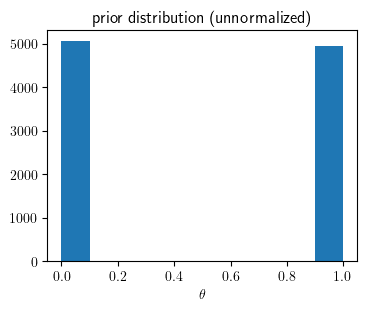

In [117]:
prior_sampling=prior(n_prior)
plt.figure(figsize=(4,3))
plt.hist(prior_sampling)
plt.title("prior distribution (unnormalized)")
plt.xlabel(r"$\theta$")
plt.show()

In [118]:
x_sim=[]
for i in range(n_prior):
    x_sim.append(simulator(prior_sampling[i]))

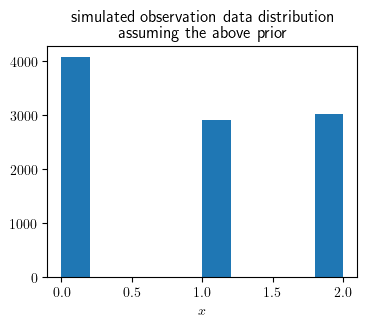

In [119]:
plt.figure(figsize=(4,3))
plt.hist(x_sim)
plt.title("simulated observation data distribution \n assuming the above prior")
plt.xlabel(r"$x$")
plt.show()

In [120]:
# rejection (accept/discard sampling point according to x_sim)
x_obs=1
posterior_sampling=[]
for i in range(n_prior):
    if x_sim[i]==x_obs:
        posterior_sampling.append(prior_sampling[i])

In [121]:
# plt.hist(posterior_sampling)
posterior_sampling=np.array(posterior_sampling)

In [122]:
float(np.sum(posterior_sampling==0))/len(posterior_sampling)

0.5725085910652921

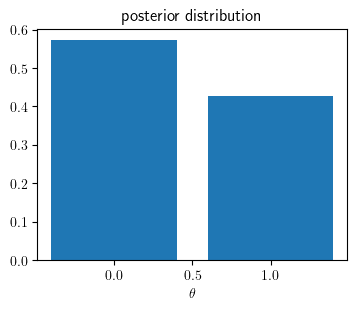

In [125]:
plt.figure(figsize=(4,3))
val,_=np.histogram(posterior_sampling,theta_bin_edges)
plt.bar([0,1],val/np.sum(val))
plt.title("posterior distribution")
plt.xlabel(r"$\theta$")
plt.show()

#### efficiency

## continuous case


In the continuous case, it's inapproapriate to discard points basing on x_obs==x_sim since they would almost never the same exactly. Therefore we need modify the algorithm (accepting "close enough x")

#### ! often times we need summary statistics S(x) to lower the dimensionality
#### ! define "close" enough

Buiding Blocks:
1. x_obs, 
    often times also summary statistics S(x)
2. prior $\pi(\theta)$
3. simulate x_sim
4. a distance metric  $\rho, || \cdot||, d$
5. a threshold $\epsilon$ defines what is "close" enough

Pseudo-code:
1. draw $\theta$ from the prior
2. simulate x_sim
3. calculate summary statistic
    may use S(x)=x if dimentionality is not a problem
4. determine whether to accept or reject: 
    if $||\cdot|| < \epsilon$ accept


### an example of continuous x

In [152]:
from scipy.stats import binom, norm, gaussian_kde
def simulator(param,n):
    z=binom.rvs(n=1, p=0.75, size=n)
    
    h1=norm.rvs(loc=param[0],size=n)
    h2=norm.rvs(loc=param[1],size=n)
    x=h1*z+h2*(1-z)
    return x

In [150]:
param=(-5,5)
n=20000

In [153]:
x_obs=simulator(param,n)

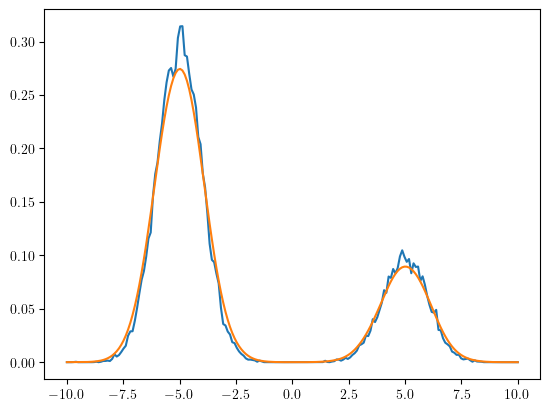

In [160]:
# import seaborn as sns # easy plotting
density = gaussian_kde(x_obs)
xs = np.linspace(-10,10,200)
density.covariance_factor = lambda : 0.01
density._compute_covariance()
plt.plot(xs,density(xs))

density.covariance_factor = lambda : .1
density._compute_covariance()
plt.plot(xs,density(xs))

plt.show()

In [161]:
# summary statsitic
def summaryS(x):
    mean=
    

SyntaxError: incomplete input (3463894201.py, line 3)